In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tqdm import tqdm
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.utils import shuffle
import matplotlib.image as image
from matplotlib import pyplot
from random import randint


In [ ]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
from sklearn import metrics

In [ ]:
BASE_DIR='/content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset'
B_PATH = '/content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset/Bengin cases'
M_PATH = '/content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset/Malignant cases'
N_PATH = '/content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset/Normal cases'

In [ ]:
num_class = {'b_1': len(os.listdir(B_PATH)),
             'm_2': len(os.listdir(M_PATH)),
             'n_3': len(os.listdir(N_PATH))}

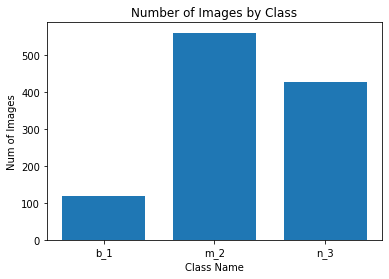

In [ ]:
plt.bar(num_class.keys(), num_class.values(), width = 0.75);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('Num of Images');

In [ ]:
directory = '/content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset'
labels = 'Bengin cases'
print(len(os.listdir(directory+'/'+labels)))
# /content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset
# /content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset/Bengin cases

120


In [ ]:
label_list = ['Bengin cases','Malignant cases' , 'Normal cases']
class_map = {
    'Bengin cases': 1,
    'Malignant cases': 2,
    'Normal cases': 3,
}
in_class_map = {
    1:'Bengin cases',
    2:'Malignant cases',
    3: 'Normal cases',
}

In [ ]:
def get_label(class_code):
    return in_class_map[class_code]

In [ ]:
def get_images_wo_aug(directory):
  IMAGES = []
  LABELS = []
  b = []
  m = []
  n = []
  l1 = ['Malignant cases' , 'Normal cases']
  for labels in l1:
    folderPath = os.path.join(BASE_DIR, labels)
    for image_file in tqdm(os.listdir(folderPath)):
      # print(image_file)
      image = cv2.imread(os.path.join(folderPath, image_file))
      image = cv2.resize(image,(150,150))
      IMAGES.append(image)
      LABELS.append(class_map[labels])
      if(labels == 'Bengin cases'):
        b.append(image)
      elif(labels == 'Malignant cases'):
        m.append(image)
      elif(labels == 'Normal cases'):
        n.append(image)


  return shuffle(IMAGES,LABELS,random_state=8)


In [ ]:
def get_images_aug():
  IMAGES1 = []
  LABELS1 = []
  folderPath='/content/drive/MyDrive/In-Med/Augmented'
  for image_file in tqdm(os.listdir(folderPath)):
    # print(image_file)
    image = cv2.imread(os.path.join(folderPath, image_file))
    image = cv2.resize(image,(150,150))
    IMAGES1.append(image)
    LABELS1.append(0)

  return shuffle(IMAGES1,LABELS1,random_state=8)

In [ ]:
def classify(directory):
  b = []
  m = []
  n = []

  for labels in label_list:
    folderPath = os.path.join(BASE_DIR, labels)
    for image_file in tqdm(os.listdir(folderPath)):
      # print(image_file)
      image = cv2.imread(os.path.join(folderPath, image_file))
      image = cv2.resize(image,(150,150))
      # IMAGES.append(image)
      # LABELS.append(class_map[labels])
      if(labels == 'Bengin cases'):
        b.append(image)
      elif(labels == 'Malignant cases'):
        m.append(image)
      elif(labels == 'Normal cases'):
        n.append(image)


  return b,m,n

In [ ]:
b,m,n = classify('/content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset')

100%|██████████| 427/427 [00:09<00:00, 46.10it/s] 


In [ ]:
b1 = np.array(b)
m1 = np.array(m)
n1 = np.array(n)

In [ ]:
b1.shape

(120, 150, 150, 3)

In [ ]:
IMAGES=[]
LABELS=[]
IMAGES1=[]
LABELS1=[]

In [ ]:
IMAGES, LABELS = get_images_wo_aug('/content/drive/MyDrive/In-Med/The IQ-OTHNCCD lung cancer dataset')

# IMAGES = np.array(IMAGES)
# LABELS = np.array(LABELS)

100%|██████████| 427/427 [00:07<00:00, 56.73it/s] 


In [ ]:
len(IMAGES)

988

In [ ]:
IMAGES1, LABELS1 = get_images_aug()

# IMAGES1 = np.array(IMAGES1)
# LABELS1 = np.array(LABELS1)

100%|██████████| 544/544 [00:05<00:00, 100.33it/s]


In [ ]:
len(IMAGES1)

544

In [ ]:
len(IMAGES)

988

In [ ]:
images_list=[]
labels_list=[]

In [ ]:
images_list=IMAGES.copy()
labels_list=LABELS.copy()

In [ ]:
len(images_list)

988

In [ ]:
images_list.extend(IMAGES1)
labels_list.extend(LABELS1)

In [ ]:
# images_list=np.append(images_list,IMAGES1)
# labels_list=np.append(labels_list,LABELS1)

In [ ]:
len(IMAGES)+len(IMAGES1)

1532

In [ ]:
len(images_list)
# len(labels_list)

1532

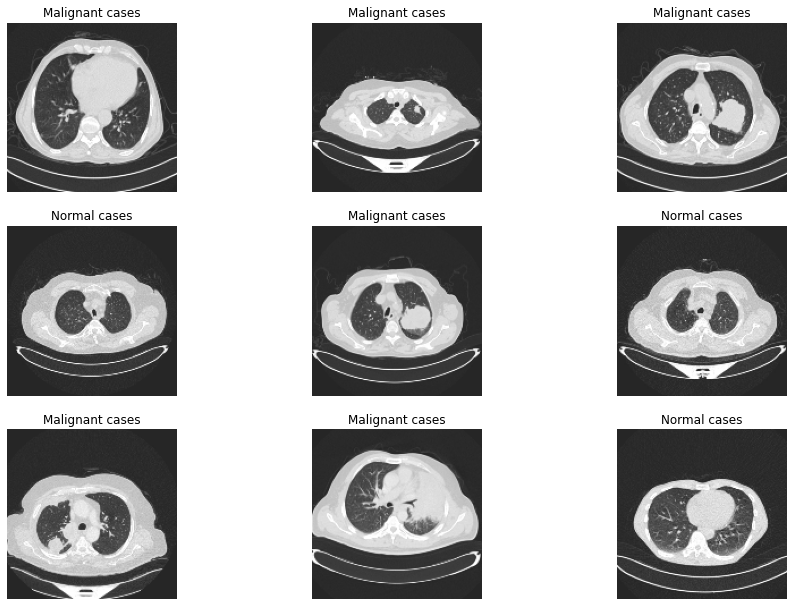

In [ ]:
f,ax = plt.subplots(3,3)
f.subplots_adjust(0,0,2,2)
for i in range(0,3,1):
    for j in range(0,3,1):
        rnd_number = randint(0,len(IMAGES))
        ax[i,j].imshow(IMAGES[rnd_number])
        l = get_label(LABELS[rnd_number])
        ax[i,j].set_title(l)
        ax[i,j].axis('off')

In [ ]:
# Variability
def vari(dir, type, size = (64, 64)):
    # calculate the average
    std_img = np.std(dir, axis = 0)
    # reshape it back to a matrix
    std_img = std_img.resize(size)
    plt.imshow(std_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Std {type}')
    plt.axis('off')
    plt.show()
    return std_img

In [ ]:
b_std = vari(b1, 'Bengin')

In [ ]:
m_std = vari(Malignant cases, 'Malignant')

In [ ]:
n_std = vari(Normal cases, 'Normal')

In [ ]:
batch_size=30

In [ ]:
datagen = ImageDataGenerator(shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip = True,
                             rotation_range = 90)

# training_set = train_datagen.flow_from_directory(B_PATH,
#                                                  target_size = (224, 224),
#                                                  batch_size = batch_size,
#                                                  class_mode = 'categorical')

In [ ]:
from PIL import Image
image_directory = B_PATH
SIZE = 224
dataset = []
cnt = 0
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(os.path.join(image_directory,image_name))
        # if image is None:
        #   print('Wrong path: ', os.path.join(image_directory + image_name))
        #   # flag=1
        #   cnt = cnt+1
        # image = Image.fromarray(image, 'RGB')
        # else:
        image = cv2.resize(image,(SIZE, SIZE))
        dataset.append(np.array(image))
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir= r'/content/drive/MyDrive/In-Med/Augmented',
                          save_prefix='dr',
                          save_format='jpg'):
    i += 1
    if i > 35:
        break

In [ ]:
# from PIL import Image
# image_directory = B_PATH
# my_images = os.listdir(image_directory)
# for i, image_name in enumerate(my_images):
#     if (image_name.split('.')[1] == 'jpg'):
#         image = cv2.imread(os.path.join(image_directory,image_name))
#         if image is None:
#           print('Wrong path: ', os.path.join(image_directory,image_name))
#           # flag=1
#           cnt = cnt+1

In [ ]:
AB_PATH = '/content/drive/MyDrive/In-Med/Augmented'

In [ ]:
# dir = 'path/to/dir'
for f in os.listdir(AB_PATH):
    os.remove(os.path.join(AB_PATH, f))

In [ ]:
aug_class = {'b_1': len(os.listdir(B_PATH)),
             'a_1': len(os.listdir(AB_PATH))
             }

In [ ]:
len(os.listdir(AB_PATH))

544

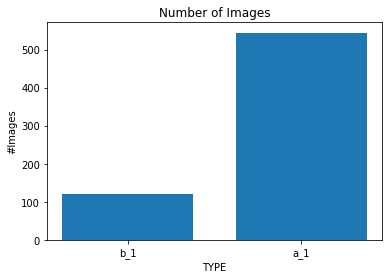

In [ ]:
plt.bar(aug_class.keys(), aug_class.values(), width = 0.75);
plt.title("Number of Images");
plt.xlabel('TYPE');
plt.ylabel('#Images');

In [ ]:
num_class1 = {'b_1': len(os.listdir(AB_PATH)),
             'm_2': len(os.listdir(M_PATH)),
             'n_3': len(os.listdir(N_PATH))}

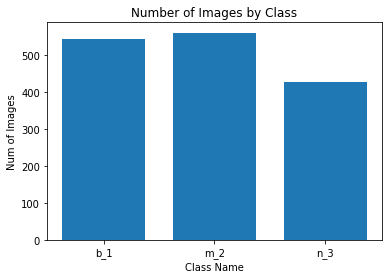

In [ ]:
plt.bar(num_class1.keys(), num_class1.values(), width = 0.75);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('Num of Images');

In [ ]:
X = np.array(images_list)
y = np.array(labels_list)

In [ ]:
print(y)

[2 2 2 ... 0 0 0]


In [ ]:
X, y = shuffle(X, y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(len(y_train))
print(len(y))

1225
1532


In [ ]:
print(y_train.shape)

(1225,)


In [ ]:
print((X_train.shape,y_train.shape))

((1225, 150, 150, 3), (1225,))


In [ ]:
print((X_test.shape,y_test.shape))

((307, 150, 150, 3), (307,))


In [ ]:
print(y_train)

[3 2 0 ... 3 0 3]


In [ ]:
model = Models.Sequential()

model.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
# model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(128,activation='relu'))
# model.add(Layers.Dense(,activation='relu'))
# model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 128)       36992     
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 64)        73792     
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 32)        18464     
                                                        

In [ ]:
model.compile(optimizer=Optimizer.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
trained = model.fit(X_train,y_train,epochs=35,validation_split=0.30)

Epoch 1/35
27/27 [==============================] - 6s 86ms/step - loss: 5.7827 - accuracy: 0.3501 - val_loss: 0.7829 - val_accuracy: 0.6141
Epoch 2/35
27/27 [==============================] - 1s 47ms/step - loss: 1.2669 - accuracy: 0.5239 - val_loss: 0.5970 - val_accuracy: 0.7717
Epoch 3/35
27/27 [==============================] - 1s 48ms/step - loss: 0.8506 - accuracy: 0.6558 - val_loss: 0.4441 - val_accuracy: 0.8505
Epoch 4/35
27/27 [==============================] - 1s 47ms/step - loss: 0.6506 - accuracy: 0.7421 - val_loss: 0.3719 - val_accuracy: 0.8723
Epoch 5/35
27/27 [==============================] - 1s 47ms/step - loss: 0.5517 - accuracy: 0.7911 - val_loss: 0.3116 - val_accuracy: 0.8967
Epoch 6/35
27/27 [==============================] - 1s 49ms/step - loss: 0.4414 - accuracy: 0.8250 - val_loss: 0.2960 - val_accuracy: 0.8967
Epoch 7/35
27/27 [==============================] - 1s 51ms/step - loss: 0.3910 - accuracy: 0.8436 - val_loss: 0.2467 - val_accuracy: 0.9130
Epoch 8/35
27

In [ ]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

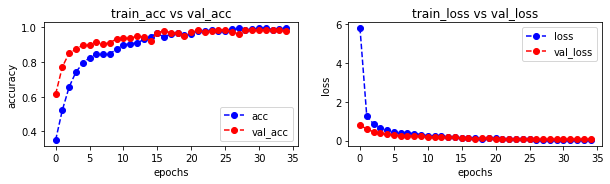

In [ ]:
plot_accuracy_loss(trained)

In [ ]:
test_loss = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 17ms/step - loss: 0.0870 - accuracy: 0.9739


In [ ]:
pred = model.predict(X_test)

10/10 [==============================] - 0s 14ms/step


In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

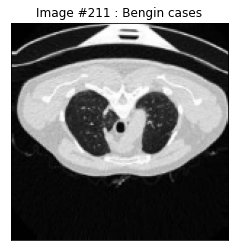

In [ ]:
pred_labels = np.argmax(pred, axis = 1) # We take the highest probability

display_random_image(label_list, X_test, pred_labels)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test, pred_labels))

Accuracy =  0.9739413680781759


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)

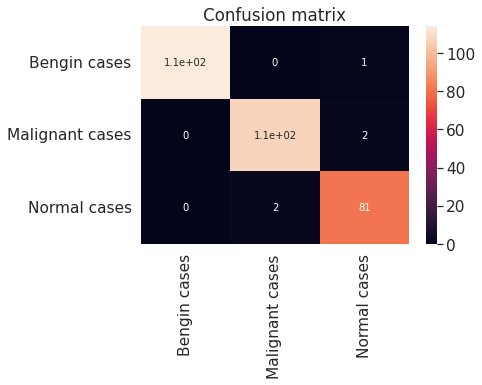

In [ ]:
CM = confusion_matrix(y_test, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=label_list,
           yticklabels=label_list, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

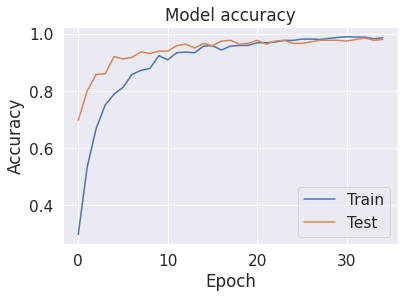

In [ ]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

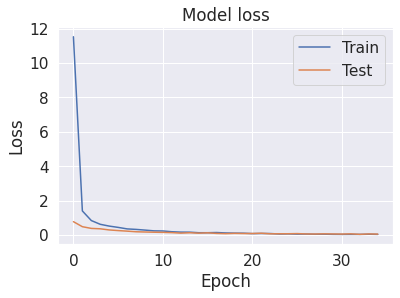

In [ ]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
model1 = Models.Sequential()

model1.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))

model1.add(Layers.MaxPool2D(5,5))
model1.add(Layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
# model.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
# model.add(Layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
# model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model1.add(Layers.MaxPool2D(5,5))
model1.add(Layers.Flatten())
# model.add(Layers.Dense(128,activation='relu'))
# model.add(Layers.Dense(,activation='relu'))
# model.add(Layers.Dense(50,activation='relu'))
model1.add(Layers.Dropout(rate=0.5))
model1.add(Layers.Dense(6,activation='softmax'))

In [ ]:
model1.compile(optimizer=Optimizer.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
trained1 = model1.fit(X_train,y_train,epochs=35,validation_split=0.30)

Epoch 1/35
27/27 [==============================] - 2s 26ms/step - loss: 93.7197 - accuracy: 0.1984 - val_loss: 6.7830 - val_accuracy: 0.4511
Epoch 2/35
27/27 [==============================] - 0s 18ms/step - loss: 35.8765 - accuracy: 0.3757 - val_loss: 3.2140 - val_accuracy: 0.6495
Epoch 3/35
27/27 [==============================] - 0s 18ms/step - loss: 21.3009 - accuracy: 0.4049 - val_loss: 2.5706 - val_accuracy: 0.6739
Epoch 4/35
27/27 [==============================] - 0s 17ms/step - loss: 11.0413 - accuracy: 0.4702 - val_loss: 1.9571 - val_accuracy: 0.7473
Epoch 5/35
27/27 [==============================] - 1s 21ms/step - loss: 6.8027 - accuracy: 0.5263 - val_loss: 1.3142 - val_accuracy: 0.7663
Epoch 6/35
27/27 [==============================] - 0s 17ms/step - loss: 4.3747 - accuracy: 0.5893 - val_loss: 0.9692 - val_accuracy: 0.7826
Epoch 7/35
27/27 [==============================] - 0s 17ms/step - loss: 3.6279 - accuracy: 0.5893 - val_loss: 0.7797 - val_accuracy: 0.8207
Epoch 8/3

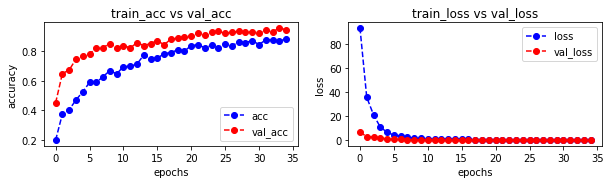

In [ ]:
plot_accuracy_loss(trained1)

In [ ]:
test_loss1 = model1.evaluate(X_test, y_test)

10/10 [==============================] - 0s 7ms/step - loss: 0.1107 - accuracy: 0.9707


In [ ]:
pred1 = model.predict(X_test)

10/10 [==============================] - 0s 14ms/step


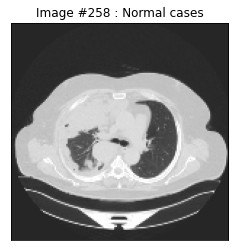

In [ ]:
pred_labels1 = np.argmax(pred1, axis = 1) # We take the highest probability

display_random_image(label_list, X_test, pred_labels1)

In [ ]:
print(pred_labels1)

[0 0 2 0 0 0 0 2 2 0 3 2 0 2 2 2 3 0 0 0 0 0 3 0 3 0 2 3 0 2 0 3 0 2 2 2 2
 3 3 0 2 2 3 2 2 0 2 0 0 2 2 2 0 0 3 2 3 0 0 3 2 3 0 2 2 3 2 3 2 0 3 2 3 3
 0 0 0 0 2 2 3 2 3 0 3 0 3 2 2 0 0 3 0 2 2 2 0 0 2 0 2 0 3 3 2 2 0 0 0 2 2
 2 2 0 3 3 2 2 2 0 3 2 0 3 0 3 2 0 0 0 0 0 0 0 2 2 3 2 3 3 2 3 2 2 3 3 2 2
 0 3 0 3 0 0 2 0 3 2 0 0 3 3 2 3 2 3 3 2 2 0 2 3 2 0 0 3 0 3 0 3 3 2 2 3 2
 2 0 0 3 0 0 0 0 2 2 3 0 2 0 2 0 3 3 0 3 2 0 0 2 3 0 0 3 2 0 0 0 0 2 0 0 3
 2 3 2 2 0 0 2 2 2 3 2 2 2 2 3 2 2 0 2 2 0 2 0 2 2 3 2 2 2 0 0 0 2 0 0 3 2
 3 3 3 2 0 2 0 2 3 0 2 0 2 2 2 0 2 3 2 3 0 0 3 0 3 0 2 3 0 3 3 3 2 0 0 0 0
 2 2 2 3 2 2 3 2 0 0 3]


In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test, pred_labels1))

Accuracy =  0.9739413680781759


In [ ]:
model2 = Models.Sequential()

model2.add(Layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))

model2.add(Layers.MaxPool2D(5,5))
model2.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
# model.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
# model.add(Layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
# model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model2.add(Layers.MaxPool2D(5,5))
model2.add(Layers.Flatten())
# model.add(Layers.Dense(128,activation='relu'))
# model.add(Layers.Dense(,activation='relu'))
# model.add(Layers.Dense(50,activation='relu'))
model2.add(Layers.Dropout(rate=0.25))
model2.add(Layers.Dense(6,activation='softmax'))

In [ ]:
model2.compile(optimizer=Optimizer.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
trained2 = model2.fit(X_train,y_train,epochs=35,validation_split=0.30)

Epoch 1/35
27/27 [==============================] - 2s 27ms/step - loss: 34.0450 - accuracy: 0.3734 - val_loss: 5.1325 - val_accuracy: 0.5761
Epoch 2/35
27/27 [==============================] - 0s 13ms/step - loss: 18.0373 - accuracy: 0.4936 - val_loss: 2.4109 - val_accuracy: 0.7446
Epoch 3/35
27/27 [==============================] - 0s 13ms/step - loss: 12.8887 - accuracy: 0.5566 - val_loss: 2.2545 - val_accuracy: 0.7853
Epoch 4/35
27/27 [==============================] - 0s 13ms/step - loss: 10.5407 - accuracy: 0.5916 - val_loss: 2.1756 - val_accuracy: 0.8125
Epoch 5/35
27/27 [==============================] - 0s 12ms/step - loss: 8.3558 - accuracy: 0.6348 - val_loss: 1.5376 - val_accuracy: 0.8505
Epoch 6/35
27/27 [==============================] - 0s 14ms/step - loss: 5.3148 - accuracy: 0.6966 - val_loss: 1.0402 - val_accuracy: 0.8777
Epoch 7/35
27/27 [==============================] - 0s 18ms/step - loss: 5.1719 - accuracy: 0.7153 - val_loss: 0.8907 - val_accuracy: 0.8859
Epoch 8/3

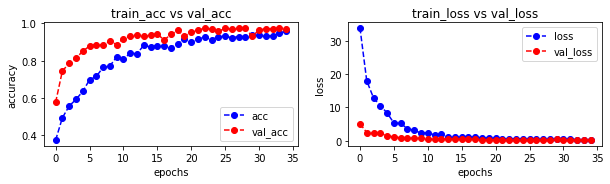

In [ ]:
plot_accuracy_loss(trained2)

In [ ]:
test_loss2 = model2.evaluate(X_test, y_test)

10/10 [==============================] - 0s 14ms/step - loss: 0.0664 - accuracy: 0.9870


In [ ]:
pred2 = model.predict(X_test)

10/10 [==============================] - 0s 14ms/step


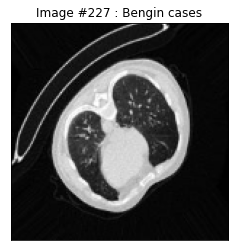

In [ ]:
pred_labels2 = np.argmax(pred2, axis = 1) # We take the highest probability

display_random_image(label_list, X_test, pred_labels2)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test, pred_labels2))

Accuracy =  0.9739413680781759


In [ ]:
model3 = Models.Sequential()

model3.add(Layers.Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))

model3.add(Layers.MaxPool2D(5,5))
model3.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
# model.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
# model.add(Layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
# model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model3.add(Layers.MaxPool2D(5,5))
model3.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model3.add(Layers.MaxPool2D(1,1))
model3.add(Layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model3.add(Layers.MaxPool2D(1,1))
model3.add(Layers.Flatten())
# model.add(Layers.Dense(128,activation='relu'))
# model.add(Layers.Dense(,activation='relu'))
# model.add(Layers.Dense(50,activation='relu'))
model3.add(Layers.Dropout(rate=0.25))
model3.add(Layers.Dense(6,activation='softmax'))

In [ ]:
model3.compile(optimizer=Optimizer.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
trained3 = model3.fit(X_train,y_train,epochs=35,validation_split=0.30)

Epoch 1/35
27/27 [==============================] - 3s 42ms/step - loss: 5.4937 - accuracy: 0.4504 - val_loss: 0.9028 - val_accuracy: 0.6739
Epoch 2/35
27/27 [==============================] - 1s 33ms/step - loss: 1.0984 - accuracy: 0.6149 - val_loss: 0.6343 - val_accuracy: 0.7473
Epoch 3/35
27/27 [==============================] - 1s 34ms/step - loss: 0.8489 - accuracy: 0.6488 - val_loss: 0.5867 - val_accuracy: 0.7473
Epoch 4/35
27/27 [==============================] - 1s 34ms/step - loss: 0.6822 - accuracy: 0.7106 - val_loss: 0.5348 - val_accuracy: 0.7717
Epoch 5/35
27/27 [==============================] - 1s 35ms/step - loss: 0.5747 - accuracy: 0.7690 - val_loss: 0.4567 - val_accuracy: 0.8207
Epoch 6/35
27/27 [==============================] - 1s 33ms/step - loss: 0.5369 - accuracy: 0.7678 - val_loss: 0.4113 - val_accuracy: 0.8315
Epoch 7/35
27/27 [==============================] - 1s 30ms/step - loss: 0.4836 - accuracy: 0.8016 - val_loss: 0.3608 - val_accuracy: 0.8750
Epoch 8/35
27

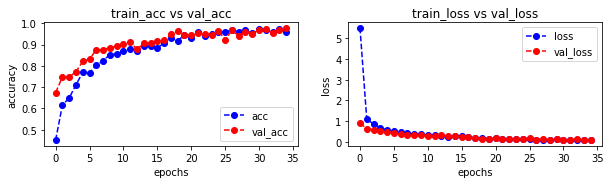

In [ ]:
plot_accuracy_loss(trained3)

In [ ]:
test_loss3 = model3.evaluate(X_test, y_test)

10/10 [==============================] - 0s 11ms/step - loss: 0.0590 - accuracy: 0.9739


In [ ]:
pred3 = model3.predict(X_test)

10/10 [==============================] - 0s 8ms/step


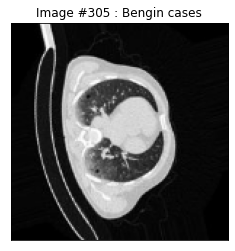

In [ ]:
pred_labels3 = np.argmax(pred3, axis = 1) # We take the highest probability

display_random_image(label_list, X_test, pred_labels3)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test, pred_labels3))

Accuracy =  0.9739413680781759


In [ ]:
model4 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling

#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :)
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])

In [ ]:
model4 = Models.Sequential()

model4.add(Layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))

model4.add(Layers.MaxPool2D(1,1))
model4.add(Layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
# model.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
# model.add(Layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
# model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model4.add(Layers.MaxPool2D(1,1))
model4.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model4.add(Layers.MaxPool2D(1,1))
# model4.add(Layers.Dropout(rate=0.25))
model4.add(Layers.Flatten())
# model.add(Layers.Dense(128,activation='relu'))
# model.add(Layers.Dense(,activation='relu'))
# model.add(Layers.Dense(50,activation='relu'))
model4.add(Layers.Dropout(rate=0.5))
model4.add(Layers.Dense(2,activation='softmax'))

In [ ]:
model4.compile(optimizer=Optimizer.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
trained4 = model4.fit(X_train,y_train,epochs=35,validation_split=0.30)

Epoch 1/35
27/27 [==============================] - 4s 91ms/step - loss: nan - accuracy: 0.3396 - val_loss: nan - val_accuracy: 0.3560
Epoch 2/35
27/27 [==============================] - 2s 75ms/step - loss: nan - accuracy: 0.3477 - val_loss: nan - val_accuracy: 0.3560
Epoch 3/35
27/27 [==============================] - 2s 73ms/step - loss: nan - accuracy: 0.3477 - val_loss: nan - val_accuracy: 0.3560
Epoch 4/35
27/27 [==============================] - 2s 76ms/step - loss: nan - accuracy: 0.3477 - val_loss: nan - val_accuracy: 0.3560
Epoch 5/35
27/27 [==============================] - 2s 72ms/step - loss: nan - accuracy: 0.3477 - val_loss: nan - val_accuracy: 0.3560
Epoch 6/35
27/27 [==============================] - 2s 72ms/step - loss: nan - accuracy: 0.3477 - val_loss: nan - val_accuracy: 0.3560
Epoch 7/35
27/27 [==============================] - 2s 72ms/step - loss: nan - accuracy: 0.3477 - val_loss: nan - val_accuracy: 0.3560
Epoch 8/35
27/27 [==============================] - 2s 

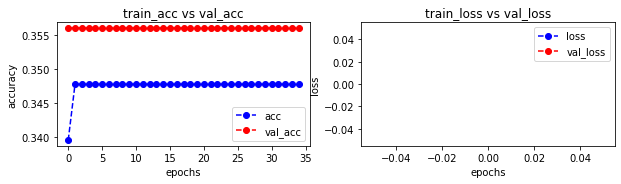

In [ ]:
plot_accuracy_loss(trained4)

In [ ]:
test_loss4 = model4.evaluate(X_test, y_test)

10/10 [==============================] - 0s 49ms/step - loss: nan - accuracy: 0.3746


In [ ]:
pred4 = model4.predict(X_test)

10/10 [==============================] - 0s 22ms/step


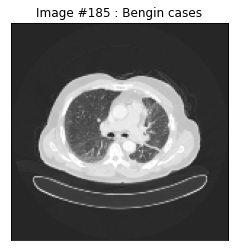

In [ ]:
pred_labels4 = np.argmax(pred4, axis = 1) # We take the highest probability

display_random_image(label_list, X_test, pred_labels4)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test, pred_labels4))

Accuracy =  0.3745928338762215
